# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>

Today we will work with scikit-learn for linear regression and seaborn, an extension of matplotlib, for data visualization.

Things I will apparently learn through this day's challenges:
1. How to use data visualization library: seaborn
2. Run and interpret linear regression using scikit-learn, plot regression scatter plot for relationships
3. Third dimension to scatter plot = bubble chart, use floor operation // cleverly

Given: imports, notebook presentation formats, data reading, challenge texts.

# Import Statements

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [17]:
print(data.shape)
print(data.head())
print('Are there any NaN values?', data.isna().values.any())
# print(data.isna().value_counts())
print('Are there any duplicate rows?', data.duplicated().values.any())
# print(data.duplicated().value_counts())
print(data.columns)
for column in data.columns:
  print(type(data[column][0]))

(5391, 6)
   Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000  
Are there any NaN values? False
Are there any duplicate rows? False
Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
<class 'numpy.int64'>
<class 'str'>
<class 'str'>

In the course, tail() was used, as well as some other methods apart from mine. The followings are some of them, but since I've already done some manipulations on the data, they might yield different results than expected with the original data

In [27]:
print(data.tail())
# We can see that the gross are 0 for these rows at the end
print(data[data.duplicated()]) # This displays all rows that are duplicates
print(len(data[data.duplicated()])) # Count of duplicate rows
print(data.info()) # This will show the data types, how could I forget

      Rank Release_Date                     Movie_Title  \
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000                    0                   0  
Empty DataFrame
Columns: [Rank, Release_Date, Movie_Title, USD_Production_Budget, USD_Worldwide_Gross, USD_Domestic_Gross]
Index: []
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data colum

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [19]:
for column in data.columns[-3:]:
  data[column] = data[column].str.replace('$','').str.replace(',','')
  data[column] = pd.to_numeric(data[column])

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In the course solution, this was done by making a list of chars $ and , and then iterating through them to replace them one at a time, which I did both in the same line.

Then that was wrapped in another loop which ran with the three column names, but not in the way I did by splicing the list of columns.

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.

In [20]:
data.Release_Date = pd.to_datetime(data.Release_Date)

data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [35]:
print('Average Production Budeget:', data.USD_Production_Budget.mean())
print('Average Worldwide Gross:', data.USD_Worldwide_Gross.mean())
print('Minimum worldwide revenue:', data.USD_Worldwide_Gross.min(), 'domestic revenue:', data.USD_Domestic_Gross.min())
print('Bottom 25% production budget:', data.USD_Production_Budget.quantile(0.25), 'Bottom 25% worldwide revenue:', data.USD_Worldwide_Gross.quantile(0.25))
print('Highest production budget:', data.USD_Production_Budget.max(), 'Highest worldwide gross revenue:', data.USD_Worldwide_Gross.max())
highest_budget_film = data.loc[data.USD_Production_Budget.idxmax()]
print(highest_budget_film.Movie_Title, 'cost', highest_budget_film.USD_Production_Budget, 'gross', highest_budget_film.USD_Worldwide_Gross)
lowest_budget_film = data.loc[data.USD_Production_Budget.idxmin()]
print(lowest_budget_film.Movie_Title, 'cost', lowest_budget_film.USD_Production_Budget, 'gross', lowest_budget_film.USD_Worldwide_Gross)

Average Production Budeget: 31113737.57837136
Average Worldwide Gross: 88855421.96271564
Minimum worldwide revenue: 0 domestic revenue: 0
Bottom 25% production budget: 5000000.0 Bottom 25% worldwide revenue: 3865206.0
Highest production budget: 425000000 Highest worldwide gross revenue: 2783918982
Avatar cost 425000000 gross 2783918982
My Date With Drew cost 1100 gross 181041


I keep forgetting things, but we have a describe() method to answer most of these things. This was the course solution that differed:

In [40]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


We can see that an average film makes almost 3x its budget worldwide, but the bottom 25% can't recuperate their costs.

We can see Avatar which cost 425m to make and grossed 2.7b and My Date with drew which cost 1100 and grossed 181k. Wow

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [38]:
zero_domestic_revenue = data[data.USD_Domestic_Gross == 0]
print('Zero domestic gross:', zero_domestic_revenue.Rank.count())
zero_domestic_revenue.sort_values(by='USD_Production_Budget', ascending=False).head()

Zero domestic gross: 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [39]:
zero_Worldwide_revenue = data[data.USD_Worldwide_Gross == 0]
print('Zero Worldwide gross:', zero_Worldwide_revenue.Rank.count())
zero_Worldwide_revenue.sort_values(by='USD_Production_Budget', ascending=False).head()

Zero Worldwide gross: 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


These movies mostly have a release date of after the data was scraped so it is natural for them to not have a gross figure yet.

### Filtering on Multiple Conditions

In [42]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print('Number of international only releases: ',len(international_releases))
international_releases.head()

Number of international only releases:  155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


We can use the python bitwise operator on a numpy array and it gives us an array of the same size as the arrays used. Since pandas is built on top of NumPy, we can use it to filter with multiple conditions.
data.loc[] is preferred over data[] for filtering because it avoids ambiguity about what we're trying to do. data[] is used to select columns as well.

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.

In [45]:
data.query('(USD_Domestic_Gross == 0) and (USD_Worldwide_Gross>0)')

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


It is the same thing but this time we use the and operator instead of the bitwise & since we're now working with each element and not the complete series as in the case of data.loc[] filtering.

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?
* Create another DataFrame called data_clean that does not include these films.

In [46]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [48]:
unreleased = data[data.Release_Date > scrape_date]
print(len(unreleased))
print(unreleased)
data_clean = data[data.Release_Date <= scrape_date]
data_clean.head()

7
      Rank Release_Date                     Movie_Title  \
5384   321   2018-09-03               A Wrinkle in Time   
5385   366   2018-10-08                  Amusement Park   
5386  2950   2018-10-08                             Meg   
5387   126   2018-12-18                         Aquaman   
5388    96   2020-12-31                     Singularity   
5389  1119   2020-12-31          Hannibal the Conqueror   
5390  2517   2020-12-31  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000 

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


We could also have used:
data_clean = data.drop(unreleased.index)

### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [51]:
money_losers = len(data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross])
print(money_losers)
print('Percentage of films that lost money: ', money_losers*100/len(data_clean))

2007
Percentage of films that lost money:  37.27711738484398


I was not using loc, then I looked at course solution. I should make it a habit to use it, because of the disadvantages not using it has, like creating a shallow copy

# Seaborn for Data Viz: Bubble Charts

We imported seaborn as sns because of convention.
Creating a scatter plot is much the same like matplotlib and plotly

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

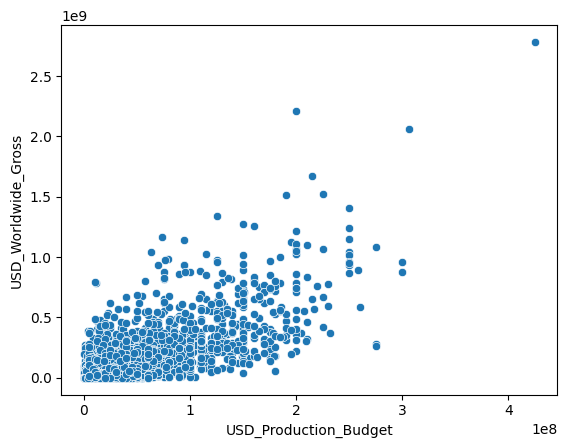

In [54]:
sns.scatterplot(data_clean,
                x= 'USD_Production_Budget', y = 'USD_Worldwide_Gross')

Since sns is built on top of matplotlib and the scatterplot method returns an axes object, we can use similar ways to format it:

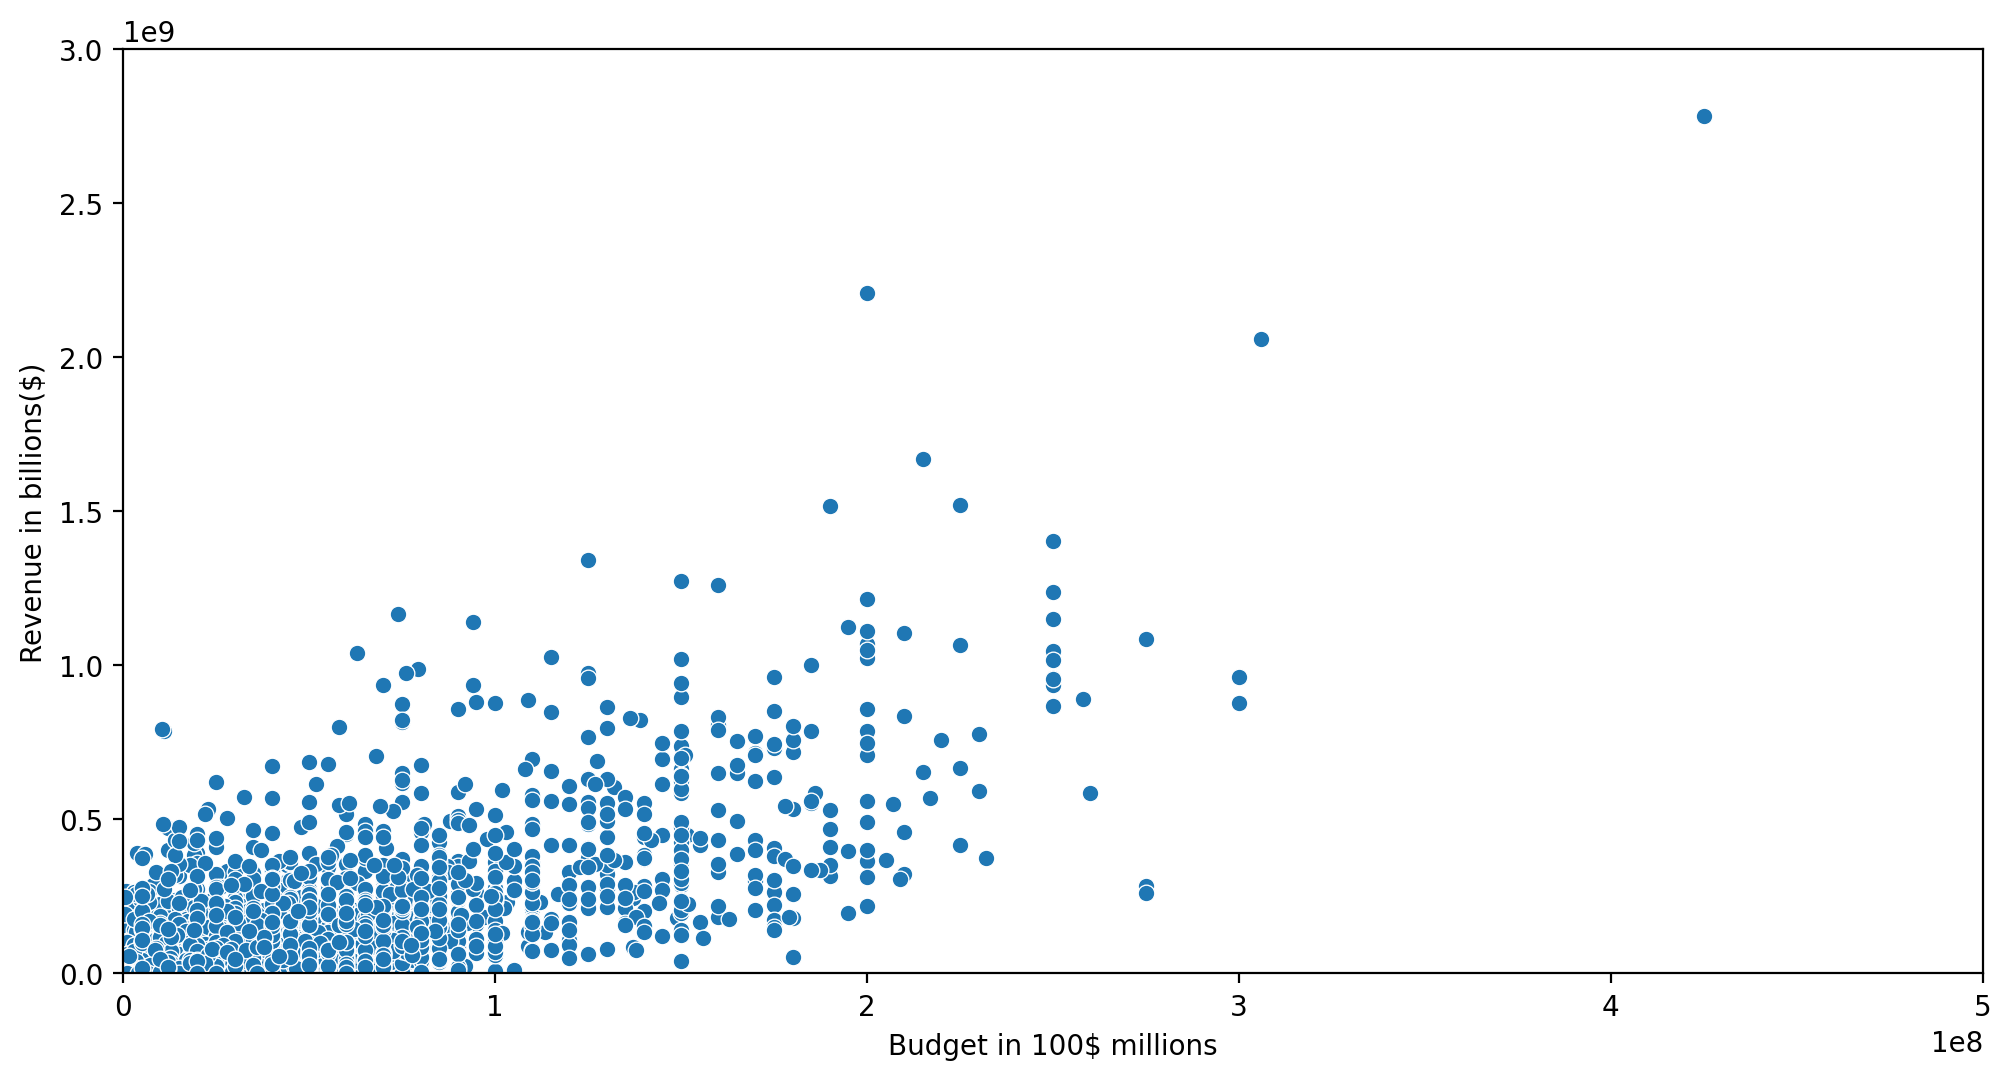

In [59]:
plt.figure(figsize=(12,6), dpi= 200)
ax1 = sns.scatterplot(data_clean,
                x= 'USD_Production_Budget', y='USD_Worldwide_Gross')

ax1.set(ylim= (0, 3000000000), xlim= (0, 500000000),
        ylabel= 'Revenue in billions($)', xlabel= 'Budget in 100$ millions')
plt.show()

We can add colors to this

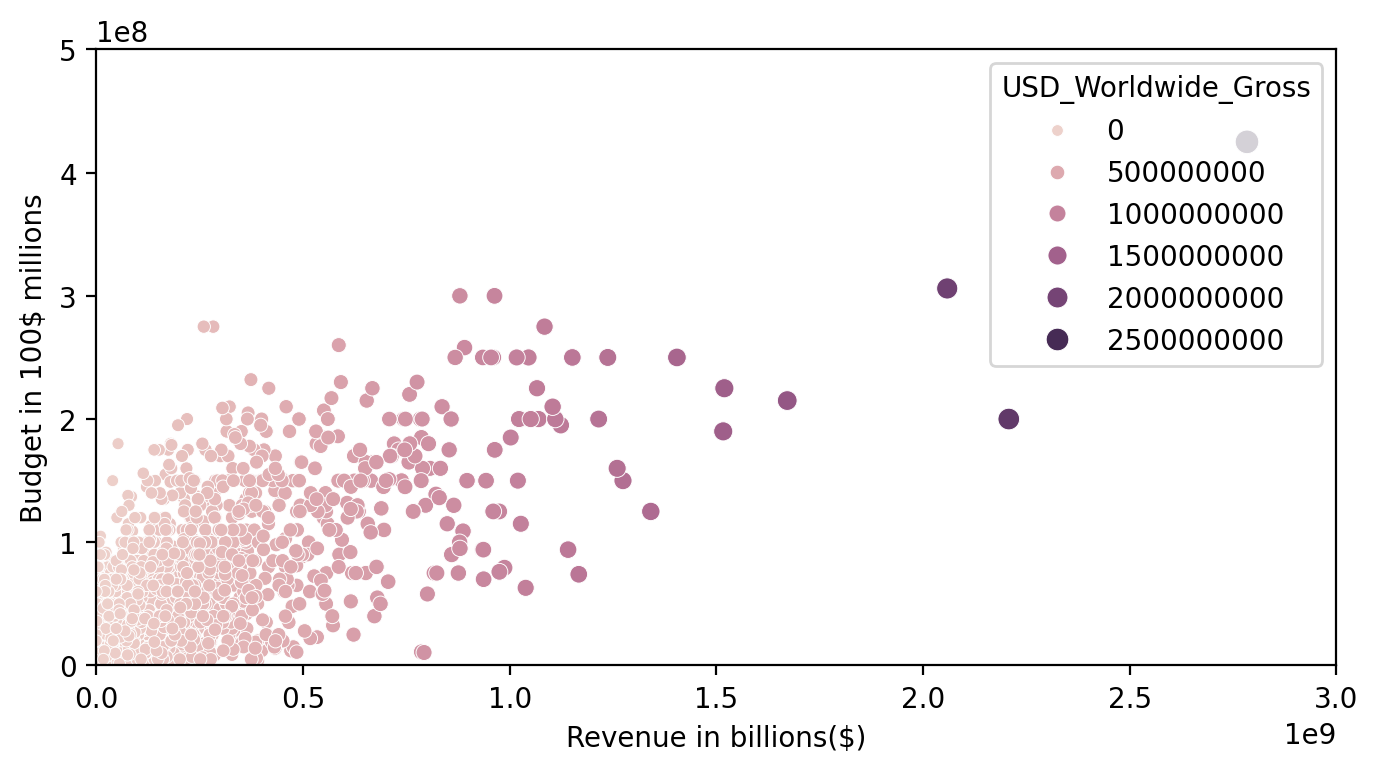

In [66]:
plt.figure(figsize=(8,4), dpi= 200)
ax1 = sns.scatterplot(data_clean,
                y= 'USD_Production_Budget', x='USD_Worldwide_Gross',
                hue='USD_Worldwide_Gross', size= 'USD_Worldwide_Gross')

ax1.set(xlim= (0, 3000000000), ylim= (0, 500000000),
        xlabel= 'Revenue in billions($)', ylabel= 'Budget in 100$ millions')
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



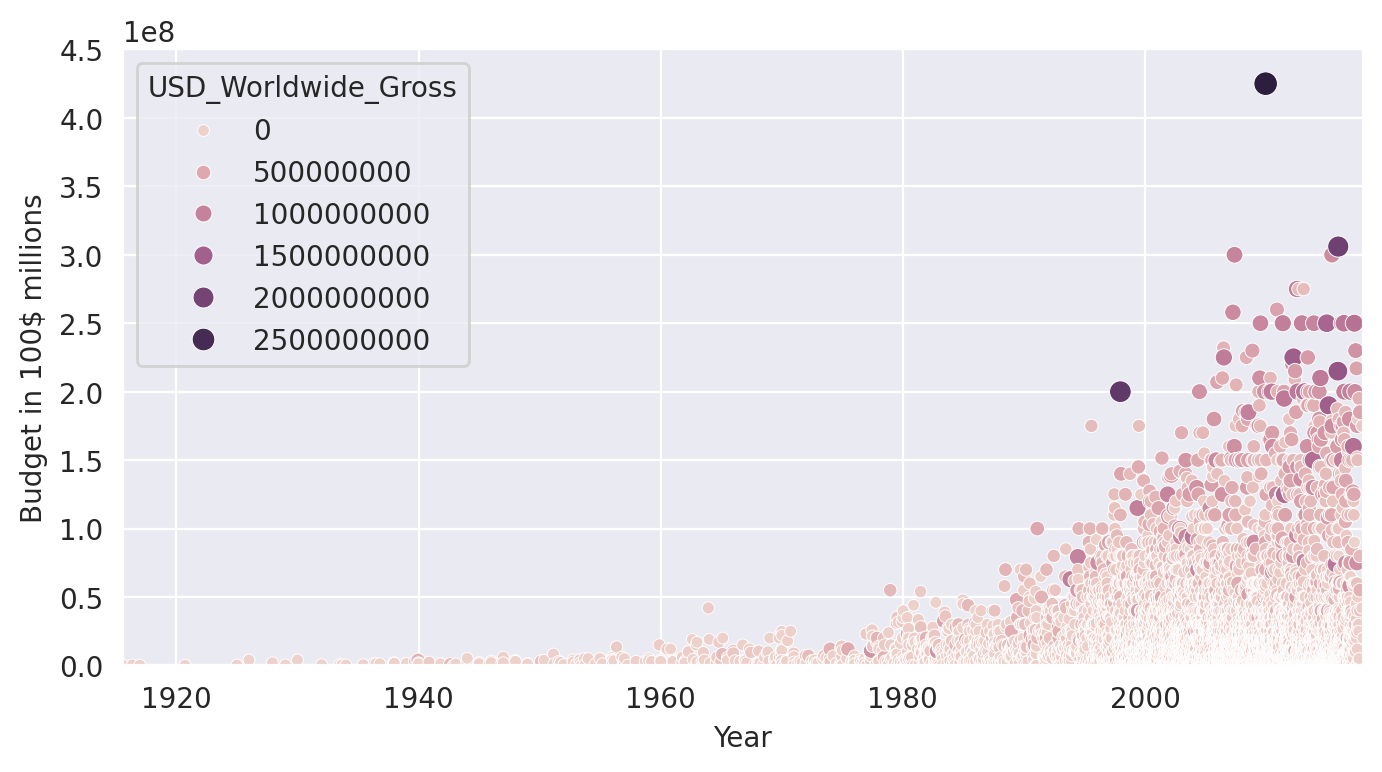

In [70]:
plt.figure(figsize=(8,4), dpi= 200)
with sns.axes_style('darkgrid'):
  ax1 = sns.scatterplot(data = data_clean,
                  x= 'Release_Date', y='USD_Production_Budget',
                  hue='USD_Worldwide_Gross', size= 'USD_Worldwide_Gross')

ax1.set(xlim= (data_clean.Release_Date.min(), data_clean.Release_Date.max()), ylim= (0, 450000000),
        xlabel= 'Year', ylabel= 'Budget in 100$ millions')
plt.show()

With the help of custom styling options available, we could make a bubble plot like this. The different <a href='https://python-graph-gallery.com/104-seaborn-themes/'>built in themes</a> are cool.

This shows a clear trend in the production budget over the years. The budget for movies has increased significantly since the 1980s while the growth as relatively lower before then.

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [78]:
decade = (pd.DatetimeIndex(data_clean.Release_Date).year // 10) * 10
print(decade)
data_clean['decade'] = decade

Index([1910, 1910, 1910, 1920, 1920, 1920, 1920, 1920, 1930, 1930,
       ...
       2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Release_Date', length=5384)


<ipython-input-78-543838511>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['decade'] = decade


I did all the operations in one, but basically we take the Release date scalar and passing it onto the DatetimeIndex function gives us a scalar from which we can thankfully extract a new scalar of just years.

Since it is a numpy array, we can use broadcasting to do a floor division by 10, then multiply everything by 10 again to make it the decade marker.

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [81]:
old_films = data_clean.loc[data_clean.decade < 1970]
new_films = data_clean.drop(old_films.index)
print(new_films.shape)
print(new_films.head())
print(old_films.shape)
print(old_films.tail())

(5231, 7)
     Rank Release_Date         Movie_Title  USD_Production_Budget  \
153  2159   1970-01-01            Waterloo               25000000   
154  2270   1970-01-01        Darling Lili               22000000   
155  3136   1970-01-01              Patton               12000000   
156  3277   1970-01-01  The Molly Maguires               11000000   
157  4265   1970-01-01             M*A*S*H                3500000   

     USD_Worldwide_Gross  USD_Domestic_Gross  decade  
153                    0                   0    1970  
154              5000000             5000000    1970  
155             62500000            62500000    1970  
156              2200000             2200000    1970  
157             81600000            81600000    1970  
(153, 7)
     Rank Release_Date                         Movie_Title  \
148  2375   1969-10-15                    Paint Your Wagon   
149  3831   1969-10-24  Butch Cassidy and the Sundance Kid   
150  2175   1969-12-16                        Hell

In [84]:
print('Films before 1970: ', len(old_films))
print('Most expensive old movie: \n', old_films.loc[old_films.USD_Production_Budget.idxmax()])

Films before 1970:  153
Most expensive old movie: 
 Rank                                    1253
Release_Date             1963-12-06 00:00:00
Movie_Title                        Cleopatra
USD_Production_Budget               42000000
USD_Worldwide_Gross                 71000000
USD_Domestic_Gross                  57000000
decade                                  1960
Name: 109, dtype: object


Once again, I forgot describe(). This is how the course solved these last two tasks:

In [85]:
old_films.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decade
count,153.00,153,153.00,153.00,153.00,153.00
mean,"4,274.77",1954-06-10 04:04:42.352941184,"4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
min,"1,253.00",1915-08-02 00:00:00,"100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00",1946-01-01 00:00:00,"1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00",1956-12-23 00:00:00,"2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00",1964-10-22 00:00:00,"5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00",1969-12-19 00:00:00,"42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"
std,742.14,NaN,"5,713,648.85","54,931,828.93","32,641,752.41",12.72


In [86]:
old_films.sort_values(by='USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
...,...,...,...,...,...,...,...
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
29,5283,1942-11-16,Cat People,134000,8000000,4000000,1940
135,5292,1968-01-10,Night of the Living Dead,114000,30000000,12000000,1960
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910


# Seaborn Regression Plots

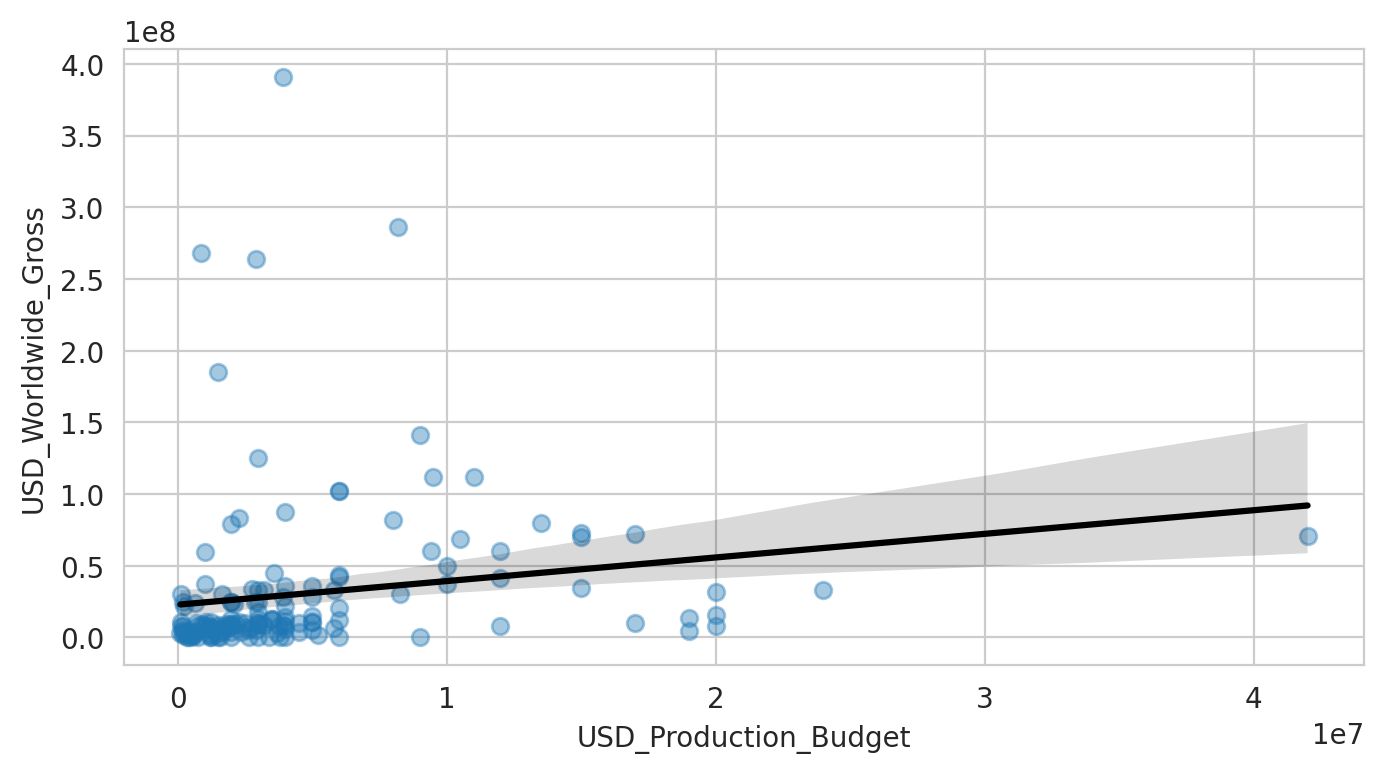

In [88]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

# Copied from the course instructions as an example

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

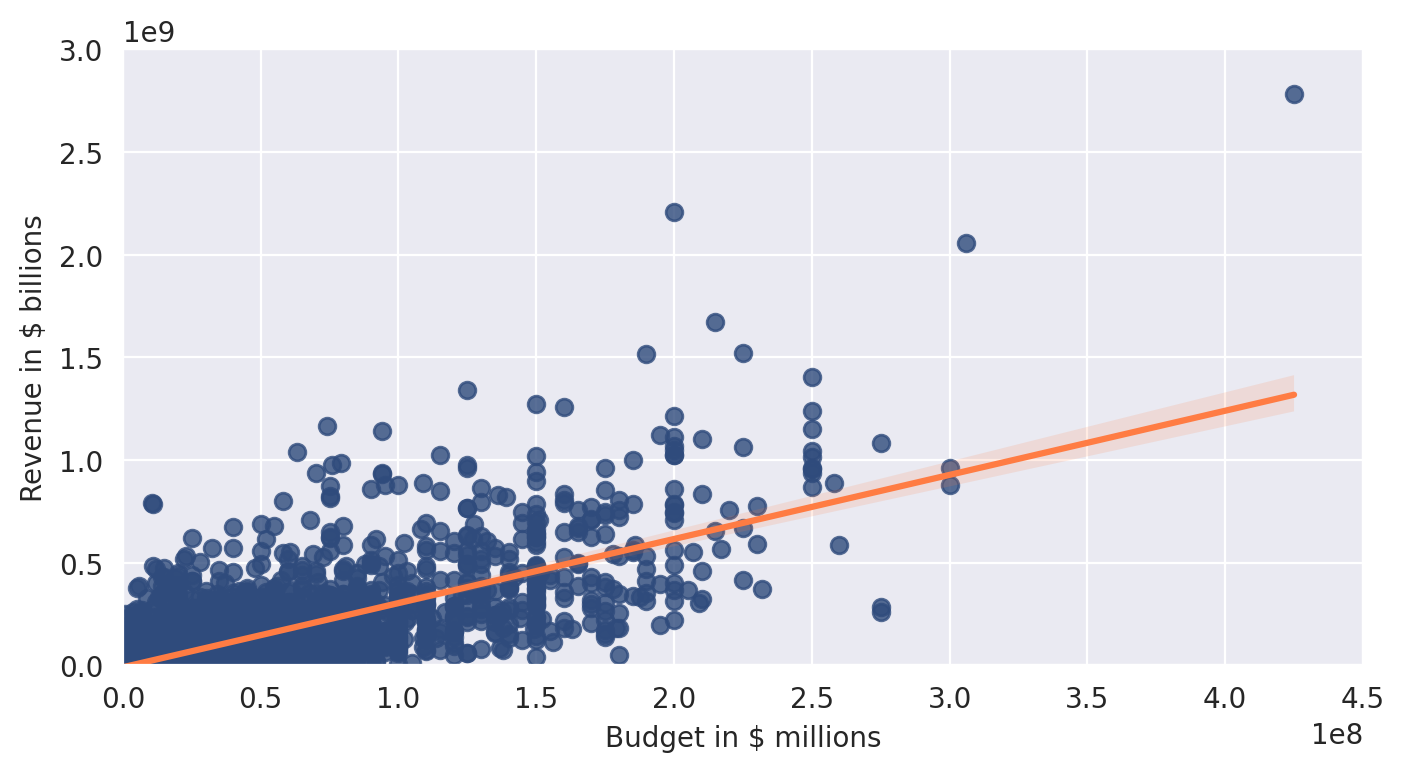

In [91]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax2 = sns.regplot(data= new_films,
              x= 'USD_Production_Budget', y= 'USD_Worldwide_Gross',
              scatter_kws= {'color': '#2f4b7c'},
              line_kws= {'color': '#ff7c43'})
  ax2.set(xlabel= 'Budget in $ millions', ylabel= 'Revenue in $ billions',
          xlim=[0, 450000000], ylim= [0, 3000000000])


Looking at the old and new films regression lines, we can see that for the same budget, the current movies have a much less room for deviation(narrow confidence interval) and would earn in the ballpark of around 20% more than in the past, for higher investments.

A movie with 150m investment would probably make 0.5bn in revenue. Not bad.

The course solution used color='dark blue hex' and inside the scatter_kws it used alpha: 0.3

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

This is a linear regression (univariate) which means we have a single explanatory variable in the model. An explanatory variable is called a feature in machine learning terms.

The above equation for a line is what our model will try to fit. It finds the appropriate value for theta 0 and theta 1 then the line can be drawn. The intercept at x=0 gives theta 0 i.e. how much revenue at 0 budget.

We can use scikit-learn to find our own regression models.

In [95]:
# Set up a model first
regression = LinearRegression()

# Explanatory Variable
x = pd.DataFrame(new_films, columns= ['USD_Production_Budget'])
# Target or Response Variable
y = pd.DataFrame(new_films, columns= ['USD_Worldwide_Gross'])

# We needed to create new dataframes because regression doesn't take pandas series as inputs
regression.fit(x, y)

# Now the values are computed after this
print(regression.intercept_) # theta0
print(regression.coef_) # theta1

[-8650768.00661027]
[[3.12259592]]


From this simple regression model, we can see that at a budget of 0, the expected revenue is -8.6m. Wild. The per-dollar boost in revenue for each dollar in production budget is 3.1 so higher budget movies earn more, 3x more.

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [100]:
x2 = pd.DataFrame(old_films, columns= ['USD_Production_Budget'])
y2 = pd.DataFrame(old_films, columns= ['USD_Worldwide_Gross'])

regression.fit(x2, y2)

print(regression.intercept_)
print(regression.coef_)
print(regression.score(x2, y2))

[22821538.63508039]
[[1.64771314]]
0.02937258620576877


Apparently the R squared score was already explained in the course instructions, but I looked at the docs for this, anyway it is a measure of how much our model can explain the data we have. Our R^2 score shows that the current model can only explain 3% of the variance in our total dataset for old movies, which can be verified by looking at the regplot above.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million?

In [ ]:
# regression.predict(x2)

In [104]:
revenue = regression.intercept_[0] + regression.coef_[0,0] * 350000000
print(f'The expected revenue for the 350m$ movie: {revenue:.10}')

The expected revenue for the 350m$ movie: 599521139.0


We had to use the numpy array access operators because above the outputs were given as a 1D array for intercept and 2D array for coefficient.

This is it for today.